In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
## Sætter grænseværdien for animationsstørrelsen op##
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Fjedre koblet af pendul ## 

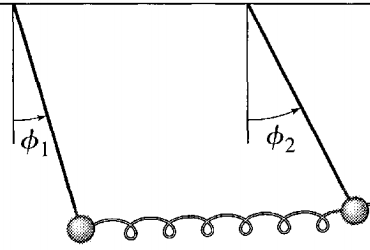

De 2 pendulers placering er fuldstændig bestemt ved $\phi_1,\phi_2$:
\begin{align}
\vec{r_1}(\phi_1)&=sin(\phi_1)L_1\hat{x}-cos(\phi_1)L_1\hat{y}\\
\vec{r_2}(\phi_2)&=sin(\phi_2)L_2\hat{x}-cos(\phi_2)L_2\hat{y}
\end{align}
Vi har derfor:
\begin{align}
T(\dot{\phi_1},\dot{\phi_2})&=\frac{m_1}{2}{L_1}^2\dot{\phi_1}^2+\frac{m_2}{2}{L_2}^2\dot{\phi_2}^2\\
U(\phi_1,\phi_2)&=m_1gL_1(1-cos(\phi_1))+m_2gL_2(1-cos(\phi_2))+\frac{k}{2}(sin(\phi_2)L_2-sin(\phi_1)L_1)^2\\
\mathcal{L}(\phi_1,\phi_2,\dot{\phi_1},\dot{\phi_2})&=\frac{m_1}{2}{L_1}^2\dot{\phi_1}^2+\frac{m_2}{2}{L_2}^2\dot{\phi_2}^2-m_1gL_1(1-cos(\phi_1))-m_2gL_2(1-cos(\phi_2))-\frac{k}{2}(sin(\phi_2)L_2-sin(\phi_1)L_1)^2
\end{align}
Som resulterer i følgende 2 bevægelsesligninger:
\begin{align}
\ddot{\phi_1}&=\frac{k}{m_1L_1}\big(sin(\phi_2)L_2-sin(\phi_1)L_1\big)cos(\phi_1)-\frac{g}{L_1}sin(\phi_1)\\
\ddot{\phi_2}&=-\frac{k}{m_2L_2}\big(sin(\phi_2)L_2-sin(\phi_1)L_1\big)cos(\phi_2)-\frac{g}{L_2}sin(\phi_2)\\
\end{align}

In [ ]:
## Konstanternes værdi ##
l1, l2, k, m1, m2, g = 3, 3, 35, 1, 1, 9.82

## startbetingelser ##
phi1_0 = np.pi/4
phi1_prik_0 = 0
phi2_0 = np.pi/3
phi2_prik_0 = 0

yinit = [phi1_0, phi1_prik_0, phi2_0, phi2_prik_0]

tinit, tfinal = 0, 10
trange = [tinit,tfinal]
ts = np.linspace(tinit, tfinal, 500)

def dydt(t,y):
    phi1 = y[0]
    phi1_prik = y[1]
    phi2 = y[2]
    phi2_prik = y[3]
    
    d_phi1_dt = phi1_prik
    d_phi2_dt = phi2_prik
    
    c1 = (np.sin(phi2)*l2-np.sin(phi1)*l1)
    
    d_phi1_prik_dt = (k/(m1*l1))*c1*np.cos(phi1)-(g/l1)*np.sin(phi1)
    d_phi2_prik_dt = -(k/(m2*l2))*c1*np.cos(phi2)-(g/l2)*np.sin(phi2)
    
    return [d_phi1_dt, d_phi1_prik_dt,d_phi2_dt, d_phi2_prik_dt]

mysol = solve_ivp(dydt, trange, yinit, t_eval = ts,rtol=3e-14)

ts = mysol.t
phi1, phi2 = mysol.y[0], mysol.y[2]
phi1_prik, phi2_prik = mysol.y[1], mysol.y[3]

In [ ]:
plt.rc('font', size=16)
fig,ax = plt.subplots(2,2,figsize=(20,10))
ax[1][0].plot(phi1,phi1_prik,linestyle='--')
ax[1][1].plot(phi2,phi2_prik,linestyle='--')

ax[0][0].plot(ts,phi1)
ax[0][1].plot(ts,phi2)

ax[1][0].grid()
ax[1][1].grid()
ax[0][0].grid()
ax[0][1].grid()

ax[1][0].set_xlabel(r'$\phi_1$')
ax[1][0].set_ylabel(r'$\frac{d\phi_1}{dt}=\dot{r\phi_1}$')
ax[1][1].set_xlabel(r'$\phi_2$')
ax[1][1].set_ylabel(r'$\frac{d\phi_2}{dt}=\dot{\phi_2}$')


ax[0][0].set_xlabel('$t$')
ax[0][0].set_ylabel(r'$\phi_1$')
ax[0][1].set_xlabel('$t$')
ax[0][1].set_ylabel(r'$\phi_2$')


In [ ]:
## Transformerer til kartesiske koordinater ##
def angle_to_cartesian(angle,l):
    xs = np.sin(angle)*l
    ys = -np.cos(angle)*l
    return xs, ys

xs1, ys1 = angle_to_cartesian(phi1,l1)
xs2_temp, ys2 = angle_to_cartesian(phi2,l2)
xs2 = []

## forskyder pendul 2 mod højre ##
forskydningskonstant = 3
for i in range(len(xs2_temp)):
    xs2.append(xs2_temp[i]+forskydningskonstant)
    
## Calculating distance between bob1 and bob2 ##
dist = []
for i in range(len(xs2)):
    d_temp = abs(np.sqrt((xs2[i]-xs1[i])**2+(ys2[i]-ys1[i])**2))
    dist.append(d_temp)

## Calcultating angle from horizontal between bob1 and bob2 ## 
heights = []
angles = []
for i in range(len(xs2)):
    h_temp = ys2[i]-ys1[i]
    heights.append(h_temp)
for k in range(len(heights)):
    angle_temp = np.arcsin(heights[k]/dist[k])
    angles.append(angle_temp)
    

##  Rotation om vilkårligt punkt ##

I draw_spring udnyttes det at et en vector $\vec{r}$ fra $(x_0,y_0)$ til $(x_1,y_1)$ kan roteres $\phi$ grader mod uret om punktet $(x_0,y_0)$ vha.:
\begin{equation}
\vec{r}_{rot} = \begin{bmatrix}x_0\\y_0\end{bmatrix}+\begin{bmatrix}cos(\phi) & -sin(\phi) \\ sin(\phi) & cos(\phi) \end{bmatrix}\bigg(\begin{bmatrix}x_1\\y_1\end{bmatrix}-\begin{bmatrix}x_0\\y_0\end{bmatrix}\bigg)
\end{equation}

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

### Masses ###
mass1_dot, = ax.plot([],[],'o',ms=8,color='green')
mass2_dot, = ax.plot([],[],'o',ms=8,color='green')

## Pendulum Lines ###
line1, = ax.plot([],[],color='black')
line2, = ax.plot([],[],color='black')

### Spring ###
spring, = ax.plot([],[],color='grey')     



def draw_spring(anchor_x0,anchor_y0,length,angle,nr_turns,spring_width,buffer_length):
    D, R, N, L = buffer_length, spring_width, nr_turns, length
    x0, y0 = anchor_x0, anchor_y0
    spring_length = L-2*D

## tegner fjeder i vandret mod +x ##
    xs = [x0,x0+D]
    ys = [y0,y0]
    
    k = 1
    for i in range(N-2):
        k*=-1
        if k<0:
            ys.append(y0+R)
        if k>0:
            ys.append(y0-R)
            
        x_temp = xs[i+1]+spring_length/N
        xs.append(x_temp)
        
    for j in range(2):
        xs.append(x0+spring_length+D*(j+1))
        ys.append(y0)
        
## roterer fjeder m. angle mod urets retning (0 grader = vandret) ##        
    Rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
    final_xs, final_ys = [], []    
    for k in range(len(xs)):
        rotation_point = np.array([[x0],[y0]])
        temp_vec = np.array([[xs[k]],[ys[k]]])-rotation_point
        final_vec = rotation_point + (Rotation_matrix @ temp_vec)
        final_xs.append(final_vec[0][0]), final_ys.append(final_vec[1][0])
        
    return final_xs, final_ys

def update(i):
    
    mass1_x, mass1_y = xs1[i], ys1[i]
    mass1_dot.set_data([mass1_x],[mass1_y])
    
    mass2_x, mass2_y = xs2[i], ys2[i]
    mass2_dot.set_data([mass2_x],[mass2_y])
    
    line1.set_data([0,xs1[i]],[0,ys1[i]])
    line2.set_data([forskydningskonstant,xs2[i]],[0,ys2[i]])
        
    spring_x, spring_y = draw_spring(mass1_x,mass1_y,dist[i],angles[i],30,0.125,0.3)
    spring.set_data([spring_x],[spring_y])
    
    return mass1_dot, mass2_dot, line1, line2, spring, 

## plotting anchors ##
ax.plot([0],[0],'o',ms=5,color="black")
ax.plot([forskydningskonstant],[0],'o',ms=5,color="black")

## Plotting ceiling ##
ax.plot([-2,forskydningskonstant+2],[0,0], lw = 3, color = 'grey')

## setting axes ## 
ax.set_xlim(-3,forskydningskonstant+4), ax.set_ylim(-5,1), ax.set_aspect("equal")

## animating ## 
anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(ts),
                               interval=10,
                               blit=True,
                               repeat_delay=0)
anim